In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os
import warnings

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
# Find Directory and Folders
Diri = "/glade/scratch/whimkao/MPAS/Forecast_Q3/"
#
# List Files
Files = os.listdir(Diri)
Files

['FILE:2021-08-28_00',
 'diag.Q3.2021-08-28_21.00.00.nc',
 'FILE:2021-08-26_00',
 'files',
 'FILE:2021-08-28_12',
 'log.atmosphere.0028.err',
 'log.atmosphere.0075.err',
 'history.Q3.2021-08-27_09.00.00.nc',
 'init_atmosphere_model',
 'log.atmosphere.0047.err',
 'diag.Q3.2021-08-30_03.00.00.nc',
 'log.atmosphere.0076.err',
 'VERSION',
 'history.Q3.2021-09-01_00.00.00.nc',
 'log.atmosphere.0031.err',
 'history.Q3.2021-08-31_03.00.00.nc',
 'diag.Q3.2021-08-29_00.00.00.nc',
 'history.Q3.2021-08-29_12.00.00.nc',
 'history.Q3.2021-08-27_06.00.00.nc',
 'log.atmosphere.0072.err',
 'log.atmosphere.0067.err',
 'history.Q3.2021-08-29_21.00.00.nc',
 'log.atmosphere.0083.err',
 'diag.Q3.2021-08-31_18.00.00.nc',
 'log.atmosphere.0056.err',
 'diag.Q3.2021-08-27_12.00.00.nc',
 'history.Q3.2021-08-27_00.00.00.nc',
 'diag.Q3.2021-08-27_18.00.00.nc',
 'history.Q3.2021-08-29_15.00.00.nc',
 'history.Q3.2021-08-29_03.00.00.nc',
 'log.atmosphere.0027.err',
 'diag.Q3.2021-08-28_03.00.00.nc',
 'history.Q3.202

In [3]:
# Create Time Step List
Time_Step_List = []
for i in range(5):
    for j in range(8):
        if j <= 3:
            Time_Step = "2021-08-"+str(i+27)+"_0"+str(j*3)+".00.00"
        else:
            Time_Step = "2021-08-"+str(i+27)+"_"+str(j*3)+".00.00"
        Time_Step_List.append(Time_Step)
Time_Step = "2021-09-01_00.00.00"
Time_Step_List.append(Time_Step)
del Time_Step_List[0]
print (Time_Step_List)

['2021-08-27_03.00.00', '2021-08-27_06.00.00', '2021-08-27_09.00.00', '2021-08-27_12.00.00', '2021-08-27_15.00.00', '2021-08-27_18.00.00', '2021-08-27_21.00.00', '2021-08-28_00.00.00', '2021-08-28_03.00.00', '2021-08-28_06.00.00', '2021-08-28_09.00.00', '2021-08-28_12.00.00', '2021-08-28_15.00.00', '2021-08-28_18.00.00', '2021-08-28_21.00.00', '2021-08-29_00.00.00', '2021-08-29_03.00.00', '2021-08-29_06.00.00', '2021-08-29_09.00.00', '2021-08-29_12.00.00', '2021-08-29_15.00.00', '2021-08-29_18.00.00', '2021-08-29_21.00.00', '2021-08-30_00.00.00', '2021-08-30_03.00.00', '2021-08-30_06.00.00', '2021-08-30_09.00.00', '2021-08-30_12.00.00', '2021-08-30_15.00.00', '2021-08-30_18.00.00', '2021-08-30_21.00.00', '2021-08-31_00.00.00', '2021-08-31_03.00.00', '2021-08-31_06.00.00', '2021-08-31_09.00.00', '2021-08-31_12.00.00', '2021-08-31_15.00.00', '2021-08-31_18.00.00', '2021-08-31_21.00.00', '2021-09-01_00.00.00']


In [4]:
# Create Empty Arrays to Store Info
Min_SLP = numpy.zeros(len(Time_Step_List))
Min_SLP_Lon_Lat = numpy.zeros((2, len(Time_Step_List)))

In [5]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Time Step
for i in range(len(Time_Step_List)):
    File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
    Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
    Sfc_Pressure_File = numpy.array(File.surface_pressure[0,:])
    Altitude_File = numpy.array(File.zgrid[:,0])
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    Sfc_Pressure_List = []
    Altitude_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 40 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            Sfc_Pressure_List.append(Sfc_Pressure_File[k])
            Altitude_List.append(Altitude_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
    Altitude_NATL = numpy.array(Altitude_List)
#
# Estimate Sea Level Pressure Using Barometric Equation
    Scale_Height = 8500
    SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height) / 100.
#
# Find Pressure and Lat Lon of Mininum SLP Location
    Min_SLP_Index = numpy.argmin(SLP_NATL)
    Min_SLP[i] = SLP_NATL[Min_SLP_Index]
    Min_SLP_Lon_Lat[0][i] = Longitude_NATL[Min_SLP_Index] - 360
    Min_SLP_Lon_Lat[1][i] = Latitude_NATL[Min_SLP_Index]
print (Min_SLP)
print (Min_SLP_Lon_Lat)

[1004.80615234 1003.36303711 1001.37634277 1002.38244629 1001.30438232
 1001.01904297 1000.21429443 1001.15710449 1001.11694336  998.61920166
  996.50396729  995.88171387  996.54901123  994.89031982  994.12127686
  995.4732666   993.74291992  992.8762207   990.05303955  988.01373291
  984.64263916  984.90380859  979.83374023  979.48431396  977.15991211
  977.84106445  979.41705322  980.41156006  983.93890381  986.68914795
  989.38873291  990.16705322  990.02874756  991.49743652  991.83862305
  992.65539551  993.47845459  993.59265137  993.62481689  992.10717773]
[[-80.30441284 -80.93548584 -81.56668091 -82.04611206 -82.67764282
  -83.15704346 -83.31008911 -83.78967285 -84.09872437 -84.73495483
  -85.04962158 -85.69006348 -86.49377441 -86.97756958 -87.625
  -87.95419312 -88.6076355  -89.26409912 -89.92373657 -90.09524536
  -90.76019287 -91.42858887 -91.60552979 -91.78363037 -91.96298218
  -92.14364624 -92.32559204 -92.5088501  -92.69342041 -92.8793335
  -93.06658936 -92.75030518 -92.622

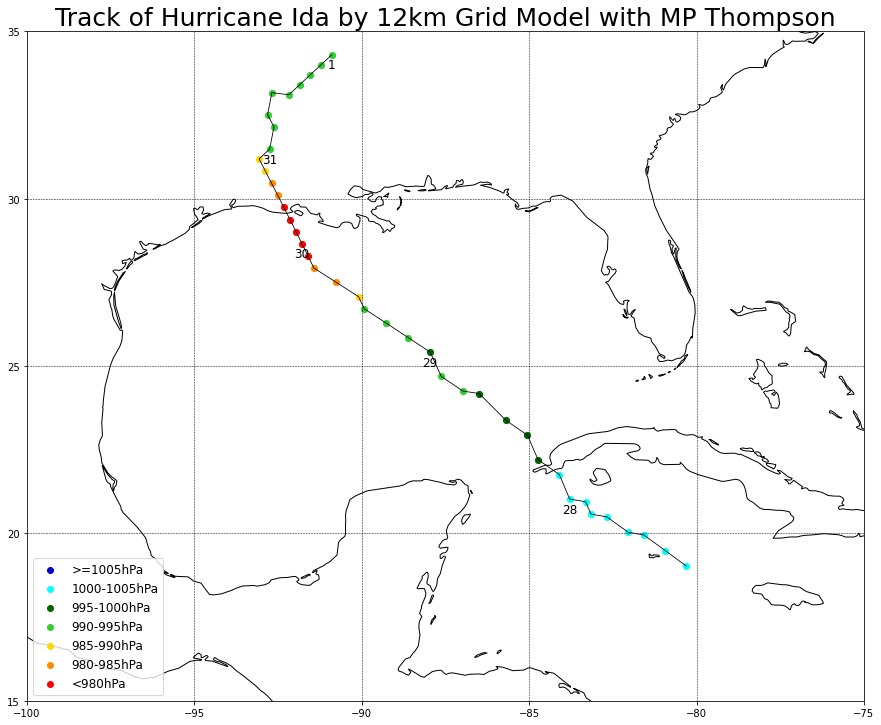

In [6]:
# Create Colour List For Labelling Sea Level Pressure
Colour_List = []
Colours = ['mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red']
Colour_Labels = ['>=1005hPa', '1000-1005hPa', '995-1000hPa', '990-995hPa', '985-990hPa', '980-985hPa', '<980hPa']
for i in range(len(Min_SLP)):
    if Min_SLP[i] >= 1005:
        Colour_List.append(Colours[0])
    elif Min_SLP[i] >= 1000:
        Colour_List.append(Colours[1])
    elif Min_SLP[i] >= 995:
        Colour_List.append(Colours[2])
    elif Min_SLP[i] >= 990:
        Colour_List.append(Colours[3])
    elif Min_SLP[i] >= 985:
        Colour_List.append(Colours[4])
    elif Min_SLP[i] >= 980:
        Colour_List.append(Colours[5])
    else:
        Colour_List.append(Colours[6])
#
# Plot Sea Level Pressure Map
Fig = pyplot.figure(figsize=(15,15))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
pyplot.plot(Min_SLP_Lon_Lat[0], Min_SLP_Lon_Lat[1], c='black', linewidth=0.8)
for i in range(len(Min_SLP)):
    pyplot.scatter(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i], c=Colour_List[i], s=38)
# Label Points
    if i % 8 == 7 and i != 39:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.3, str(int((i+1)/8+27)), ha='center', va='center', \
        fontdict={'size':12}, color='black')
    if i == 39:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.3, str(1), ha='center', va='center', \
        fontdict={'size':12}, color='black')
#
# Add Gridlines
pyplot.xlim(-98,-75)
pyplot.ylim(15,35)
x_Axis = numpy.arange(-100,-70,5)
y_Axis = numpy.arange(15,40,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
pyplot.title('Track of Hurricane Ida by 12km Grid Model with MP Thompson', fontsize=25)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=3, fontsize=12)
Fig.savefig('Q3_Model.png', bbox_inches='tight')

In [7]:
# Create Colour List For Labelling Sea Level Pressure
Model_Colour_List = []
Colours = ['black', 'navy', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(Min_SLP)):
    if Min_SLP[i] >= 1010:
        Model_Colour_List.append(Colours[0])
    elif Min_SLP[i] >= 1005:
        Model_Colour_List.append(Colours[1])
    elif Min_SLP[i] >= 1000:
        Model_Colour_List.append(Colours[2])
    elif Min_SLP[i] >= 990:
        Model_Colour_List.append(Colours[3])
    elif Min_SLP[i] >= 980:
        Model_Colour_List.append(Colours[4])
    elif Min_SLP[i] >= 965:
        Model_Colour_List.append(Colours[5])
    elif Min_SLP[i] >= 950:
        Model_Colour_List.append(Colours[6])
    elif Min_SLP[i] >= 930:
        Model_Colour_List.append(Colours[7])
    else:
        Model_Colour_List.append(Colours[6])

In [8]:
Ida_Best_Track = pandas.read_csv("Hurricane_Ida_BST.csv")
BST_SLP = numpy.array(Ida_Best_Track["Pressure"])
BST_Lat = numpy.array(Ida_Best_Track["Lat"])
BST_Lon = numpy.array(Ida_Best_Track["Lon"])
BST_SLP

array([1004, 1002,  996,  987,  989,  987,  986,  976,  967,  950,  929,
        932,  944,  978,  992,  996,  996,  996,  996,  999, 1000])

In [9]:
Q1_Ida = pandas.read_csv("Q1_Ida.csv")
Q1_SLP = numpy.array(Q1_Ida["Pressure"])
Q1_Lat = numpy.array(Q1_Ida["Lat"])
Q1_Lon = numpy.array(Q1_Ida["Lon"])
Q1_SLP

array([1005.72359375, 1007.53882813, 1006.8778125 , 1005.55195312,
       1006.40523437, 1007.56132813, 1007.49984375, 1006.72328125,
       1007.670625  , 1009.13054688, 1008.61039063, 1007.93960938,
       1008.78742187, 1009.80210937, 1009.81921875, 1009.06015625,
       1009.2046875 , 1009.81929687, 1010.31054688, 1009.37546875,
       1009.20945312, 1009.81257812, 1008.73117187, 1007.93898438,
       1007.34046875, 1007.61398437, 1007.10023438, 1005.58851563,
       1004.69476562, 1004.40492188, 1003.271875  , 1002.55585937,
       1001.95609375, 1003.09601562, 1003.7034375 , 1002.14726563,
       1002.01109375, 1002.71679688, 1002.93171875, 1002.64953125,
       1002.84976563])

In [10]:
Q2_Ida = pandas.read_csv("Q2_Ida.csv")
Q2_SLP = numpy.array(Q2_Ida["Pressure"])
Q2_Lat = numpy.array(Q2_Ida["Lat"])
Q2_Lon = numpy.array(Q2_Ida["Lon"])
Q2_SLP

array([1002.80841064, 1004.71234131, 1003.18200684, 1001.33868408,
       1001.8371582 , 1000.70404053, 1000.76556396,  999.48614502,
       1000.51000977,  998.73718262,  997.71075439,  994.29992676,
        996.0524292 ,  995.59967041,  997.8092041 ,  996.52593994,
        996.20458984,  993.86486816,  992.38171387,  990.09759521,
        988.71875   ,  985.22338867,  985.04046631,  981.11914062,
        981.87548828,  978.55609131,  978.43182373,  978.35522461,
        977.66015625,  982.40460205,  986.75891113,  987.63299561,
        989.86383057,  990.12036133,  990.01580811,  990.94775391,
        991.8873291 ,  992.71789551,  993.38806152,  992.17016602,
        992.29321289])

In [11]:
# Create Colour List For Labelling Sea Level Pressure
BST_Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(BST_SLP)):
    if BST_SLP[i] >= 1010:
        BST_Colour_List.append(Colours[0])
    elif BST_SLP[i] >= 1005:
        BST_Colour_List.append(Colours[1])
    elif BST_SLP[i] >= 1000:
        BST_Colour_List.append(Colours[2])
    elif BST_SLP[i] >= 990:
        BST_Colour_List.append(Colours[3])
    elif BST_SLP[i] >= 980:
        BST_Colour_List.append(Colours[4])
    elif BST_SLP[i] >= 965:
        BST_Colour_List.append(Colours[5])
    elif BST_SLP[i] >= 950:
        BST_Colour_List.append(Colours[6])
    elif BST_SLP[i] >= 930:
        BST_Colour_List.append(Colours[7])
    else:
        BST_Colour_List.append(Colours[8])

In [12]:
# Create Colour List For Labelling Sea Level Pressure
Q1_Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(Q1_SLP)):
    if Q1_SLP[i] >= 1010:
        Q1_Colour_List.append(Colours[0])
    elif Q1_SLP[i] >= 1005:
        Q1_Colour_List.append(Colours[1])
    elif Q1_SLP[i] >= 1000:
        Q1_Colour_List.append(Colours[2])
    elif Q1_SLP[i] >= 990:
        Q1_Colour_List.append(Colours[3])
    elif Q1_SLP[i] >= 980:
        Q1_Colour_List.append(Colours[4])
    elif Q1_SLP[i] >= 965:
        Q1_Colour_List.append(Colours[5])
    elif Q1_SLP[i] >= 950:
        Q1_Colour_List.append(Colours[6])
    elif Q1_SLP[i] >= 930:
        Q1_Colour_List.append(Colours[7])
    else:
        Q1_Colour_List.append(Colours[8])

In [13]:
# Create Colour List For Labelling Sea Level Pressure
Q2_Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(Q2_SLP)):
    if Q2_SLP[i] >= 1010:
        Q2_Colour_List.append(Colours[0])
    elif Q2_SLP[i] >= 1005:
        Q2_Colour_List.append(Colours[1])
    elif Q2_SLP[i] >= 1000:
        Q2_Colour_List.append(Colours[2])
    elif Q2_SLP[i] >= 990:
        Q2_Colour_List.append(Colours[3])
    elif Q2_SLP[i] >= 980:
        Q2_Colour_List.append(Colours[4])
    elif Q2_SLP[i] >= 965:
        Q2_Colour_List.append(Colours[5])
    elif Q2_SLP[i] >= 950:
        Q2_Colour_List.append(Colours[6])
    elif Q2_SLP[i] >= 930:
        Q2_Colour_List.append(Colours[7])
    else:
        Q2_Colour_List.append(Colours[8])

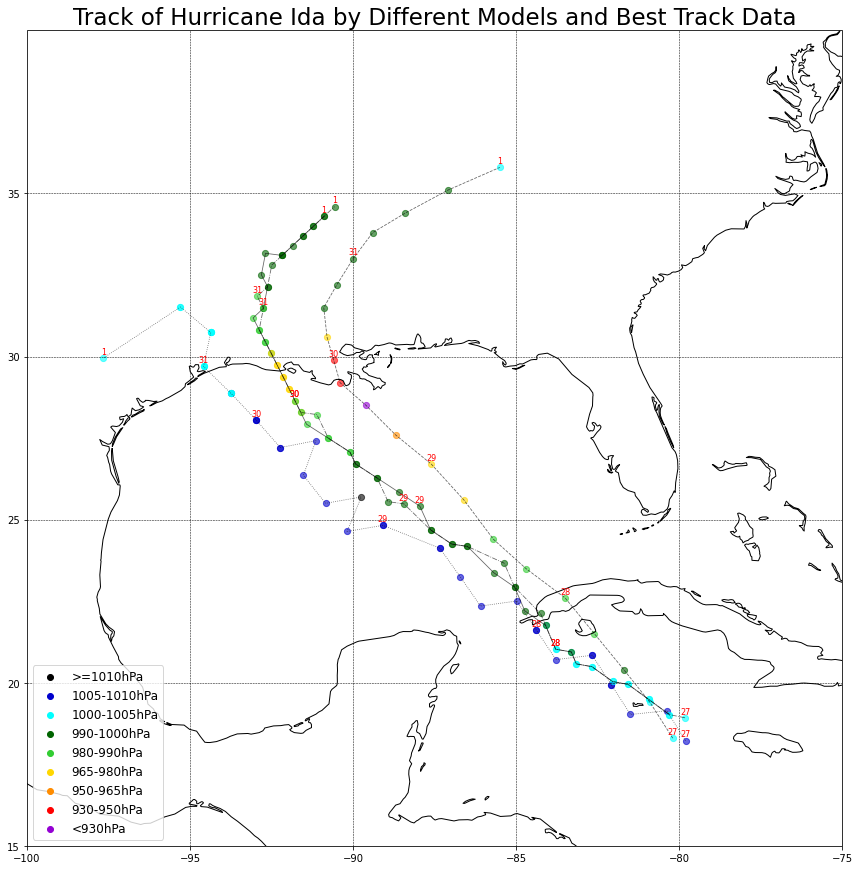

In [14]:
# Plot Ida Track
Fig = pyplot.figure(figsize=(15,15))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
#
# Plot Model SLP
pyplot.plot(Min_SLP_Lon_Lat[0], Min_SLP_Lon_Lat[1], c='black', linewidth=0.8, linestyle='-', alpha=0.6)
for i in range(len(Min_SLP)):
    pyplot.scatter(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i], c=Model_Colour_List[i], s=38, alpha=0.6)
# Label Points
    if i % 8 == 7 and i != 39:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]+0.2, str(int((i+1)/8+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 39:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Plot Q1 SLP
pyplot.plot(Q1_Lon, Q1_Lat, c='black', linewidth=0.8, linestyle=':', alpha=0.6)
for i in range(len(Q1_SLP)):
    pyplot.scatter(Q1_Lon[i], Q1_Lat[i], c=Q1_Colour_List[i], s=38, alpha=0.6)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Q1_Lon[i], Q1_Lat[i]+0.2, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 40:
        Axis.text(Q1_Lon[i], Q1_Lat[i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Plot Q2 SLP
pyplot.plot(Q2_Lon, Q2_Lat, c='black', linewidth=0.8, linestyle='-.', alpha=0.6)
for i in range(len(Q2_SLP)):
    pyplot.scatter(Q2_Lon[i], Q2_Lat[i], c=Q2_Colour_List[i], s=38, alpha=0.6)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Q2_Lon[i], Q2_Lat[i]+0.2, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 40:
        Axis.text(Q2_Lon[i], Q2_Lat[i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Plot Ida Best Track SLP
pyplot.plot(BST_Lon, BST_Lat, c='black', linewidth=0.8, linestyle='--', alpha=0.6)
for i in range(len(BST_SLP)):
    pyplot.scatter(BST_Lon[i], BST_Lat[i], c=BST_Colour_List[i], s=38, alpha=0.6)
# Label Points
    if i % 4 == 0 and i != 20:
        Axis.text(BST_Lon[i], BST_Lat[i]+0.2, str(int(i/4+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 20:
        Axis.text(BST_Lon[i], BST_Lat[i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Add Gridlines
pyplot.xlim(-98,-75)
pyplot.ylim(15,40)
x_Axis = numpy.arange(-100,-70,5)
y_Axis = numpy.arange(15,40,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=3, fontsize=12)
Fig.savefig('Q3_Compare.png', bbox_inches='tight')

In [15]:
# Create DataFrame to Store Data
Q3_DF = pandas.DataFrame({"Time": Time_Step_List, "Pressure": Min_SLP, \
"Lon": Min_SLP_Lon_Lat[0], "Lat": Min_SLP_Lon_Lat[1]})
Q3_DF

,Time,Pressure,Lon,Lat
0,2021-08-27_03.00.00,1004.806152,-80.304413,19.022711
1,2021-08-27_06.00.00,1003.363037,-80.935486,19.486996
2,2021-08-27_09.00.00,1001.376343,-81.566681,19.947590
3,2021-08-27_12.00.00,1002.382446,-82.046112,20.037718
4,2021-08-27_15.00.00,1001.304382,-82.677643,20.492136
5,2021-08-27_18.00.00,1001.019043,-83.157043,20.578018
6,2021-08-27_21.00.00,1000.214294,-83.310089,20.943485
7,2021-08-28_00.00.00,1001.157104,-83.789673,21.026964
8,2021-08-28_03.00.00,1001.116943,-84.098724,21.757311
9,2021-08-28_06.00.00,998.619202,-84.734955,22.202574


In [16]:
# Output Data File
Filename_Q3 = "Q3_Ida.csv"
Q3_DF.to_csv(Filename_Q3)

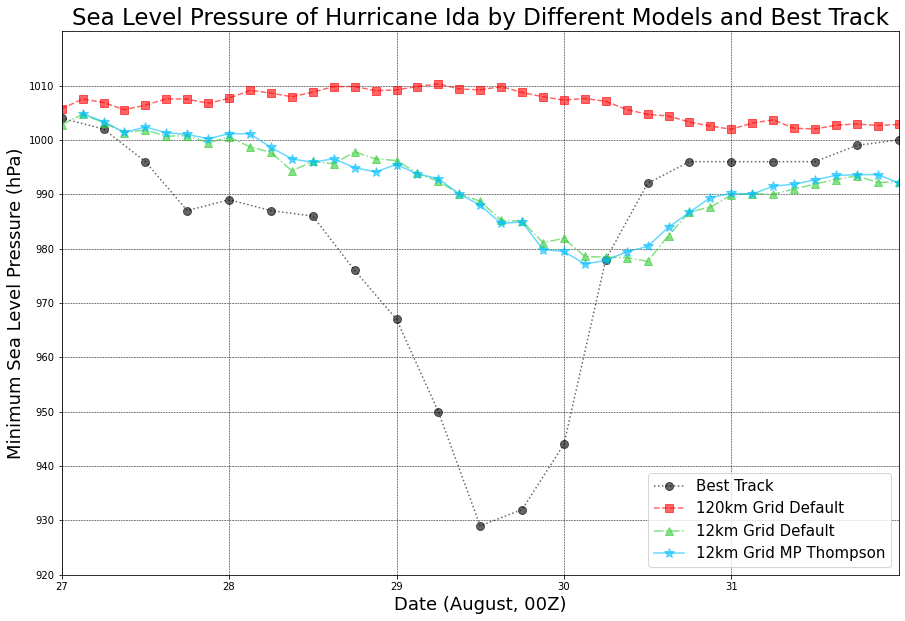

In [17]:
# Plot SLP Graph
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1)
Time_List = numpy.arange(27,32.125,0.125)
Time_List_2 = numpy.arange(27,32.25,0.25)
Time_List_3 = numpy.arange(27.125,32.125,0.125)
pyplot.plot(Time_List_2, BST_SLP, linewidth=1.5, marker='o', markersize=8, color='black', linestyle=':', \
alpha=0.6, label='Best Track')
pyplot.plot(Time_List, Q1_SLP, linewidth=1.5, marker='s', markersize=8, color='red', linestyle='--', \
alpha=0.6, label='120km Grid Default')
pyplot.plot(Time_List, Q2_SLP, linewidth=1.5, marker='^', markersize=8, color='limegreen', linestyle='-.', \
alpha=0.6, label='12km Grid Default')
pyplot.plot(Time_List_3, Min_SLP, linewidth=1.5, marker='*', markersize=10, color='deepskyblue', linestyle='-', \
alpha=0.6, label='12km Grid MP Thompson')
#
# Add Gridlines
pyplot.xlim(27,32)
pyplot.ylim(920,1020)
x_Axis = numpy.arange(27,32,1)
y_Axis = numpy.arange(920,1020,10)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = pyplot.grid(linewidth=0.5, color='black', linestyle='--')
pyplot.xlabel('Date (August, 00Z)', fontsize=18)
pyplot.ylabel('Minimum Sea Level Pressure (hPa)', fontsize=18)
pyplot.title('Sea Level Pressure of Hurricane Ida by Different Models and Best Track', fontsize=23)
#
# Add Legend
pyplot.legend(loc=4, fontsize=15)
Fig.savefig('Q3_SLP_Compare.png', bbox_inches='tight')

In [19]:
# Calculate PACE (Pressure ACE) for Q2, Q3 Models and Best Track
PACE_Q3 = numpy.zeros(len(Min_SLP))
PACE_Q2 = numpy.zeros(len(Min_SLP))
PACE_Q1 = numpy.zeros(len(Min_SLP))
PACE_BST = numpy.zeros(len(BST_SLP))
for i in range(len(Min_SLP)):
    SLP_Diff = 1010 - Min_SLP[i]
    PACE_Value = 10**-4 * (((-0.00105371 * SLP_Diff**2 + 0.568357 * SLP_Diff + 14.329) * 3.6 / 1.85) ** 2) / 2
    if i == 0:
        PACE_Q3[i] = PACE_Value
    else:
        PACE_Q3[i] = PACE_Q3[i-1] + PACE_Value
for i in range(len(Min_SLP)):
    SLP_Diff = 1010 - Q2_SLP[i+1]
    PACE_Value = 10**-4 * (((-0.00105371 * SLP_Diff**2 + 0.568357 * SLP_Diff + 14.329) * 3.6 / 1.85) ** 2) / 2
    if i == 0:
        PACE_Q2[i] = PACE_Value
    else:
        PACE_Q2[i] = PACE_Q2[i-1] + PACE_Value
for i in range(len(Min_SLP)):
    if Q1_SLP[i+1] < 1010:
        SLP_Diff = 1010 - Q1_SLP[i+1]
    else:
        SLP_Diff = 0
    PACE_Value = 10**-4 * (((-0.00105371 * SLP_Diff**2 + 0.568357 * SLP_Diff + 14.329) * 3.6 / 1.85) ** 2) / 2
    if i == 0:
        PACE_Q1[i] = PACE_Value
    else:
        PACE_Q1[i] = PACE_Q1[i-1] + PACE_Value
for i in range(len(BST_SLP)):
    SLP_Diff = 1010 - BST_SLP[i]
    PACE_Value = 10**-4 * (((-0.00105371 * SLP_Diff**2 + 0.568357 * SLP_Diff + 14.329) * 3.6 / 1.85) ** 2)
    if i == 0:
        PACE_BST[i] = PACE_Value
    else:
        PACE_BST[i] = PACE_BST[i-1] + PACE_Value
print (PACE_Q3)
print (PACE_Q2)
print (PACE_Q1)
print (PACE_BST)

[0.05635564 0.11807401 0.18752169 0.25300543 0.3227405  0.39362017
 0.46777124 0.53809609 0.60858213 0.68940403 0.7794468  0.87228188
 0.96212391 1.0594814  1.1604086  1.25509597 1.35779897 1.46461791
 1.58529985 1.71641747 1.86553039 2.01321688 2.18952307 2.36787183
 2.56002823 2.74809915 2.92684208 3.09978998 3.25277295 3.39085261
 3.5148958  3.6350046  3.75580879 3.86931196 3.98114563 4.0890239
 4.19297576 4.29638759 4.39964752 4.51017421]
[0.05669772 0.11910388 0.1887019  0.25632145 0.32847406 0.40037728
 0.47754299 0.55048455 0.63080463 0.71553494 0.81562813 0.90769357
 1.00180607 1.08610903 1.17605386 1.26743558 1.36956482 1.47876195
 1.59921978 1.72669044 1.87263873 2.01958095 2.18844954 2.35299848
 2.53681554 2.72136931 2.90637774 3.09553058 3.25708299 3.39479242
 3.52789656 3.64953206 3.76987545 3.89074478 4.00695883 4.118555
 4.22613301 4.33051315 4.44073422 4.55035923]
[0.04679681 0.09583324 0.14950197 0.20016815 0.24688955 0.29381715
 0.34338389 0.38973976 0.43133719 0.4746

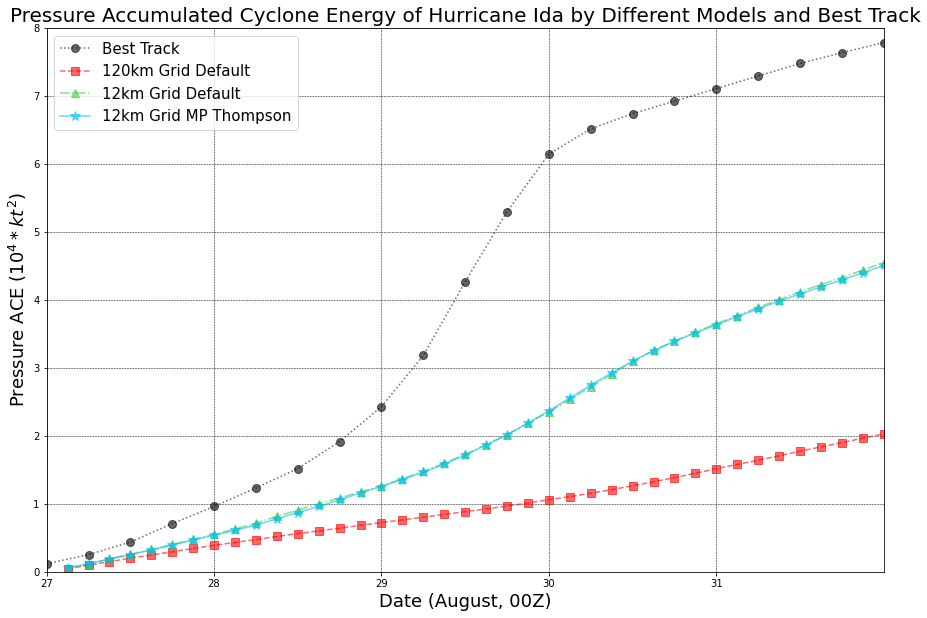

In [20]:
# Plot PACE Graph
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1)
Time_List = numpy.arange(27.125,32.125,0.125)
Time_List_2 = numpy.arange(27,32.25,0.25)
pyplot.plot(Time_List_2, PACE_BST, linewidth=1.5, marker='o', markersize=8, color='black', linestyle=':', \
alpha=0.6, label='Best Track')
pyplot.plot(Time_List, PACE_Q1, linewidth=1.5, marker='s', markersize=8, color='red', linestyle='--', \
alpha=0.6, label='120km Grid Default')
pyplot.plot(Time_List, PACE_Q2, linewidth=1.5, marker='^', markersize=8, color='limegreen', linestyle='-.', \
alpha=0.6, label='12km Grid Default')
pyplot.plot(Time_List, PACE_Q3, linewidth=1.5, marker='*', markersize=10, color='deepskyblue', linestyle='-', \
alpha=0.6, label='12km Grid MP Thompson')
#
# Add Gridlines
pyplot.xlim(27,32)
pyplot.ylim(0,8)
x_Axis = numpy.arange(27,32,1)
y_Axis = numpy.arange(0,9,1)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = pyplot.grid(linewidth=0.5, color='black', linestyle='--')
pyplot.xlabel('Date (August, 00Z)', fontsize=18)
pyplot.ylabel('Pressure ACE ($ 10^4 * kt^2 $)', fontsize=18)
pyplot.title('Pressure Accumulated Cyclone Energy of Hurricane Ida by Different Models and Best Track', fontsize=20)
#
# Add Legend
pyplot.legend(loc=2, fontsize=15)
Fig.savefig('Q3_PACE_Compare.png', bbox_inches='tight')

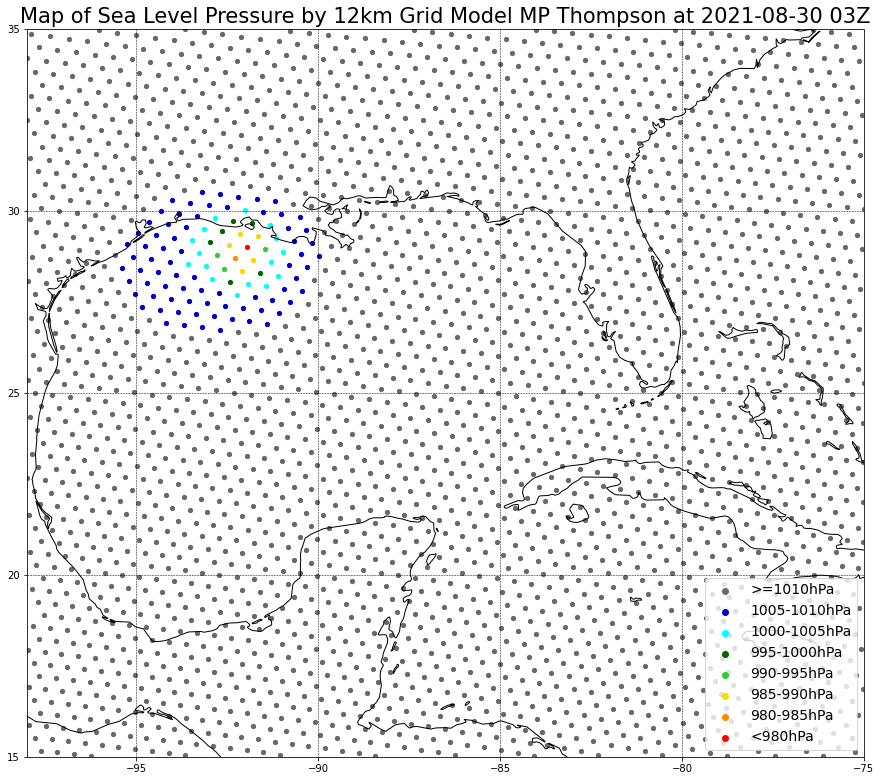

In [30]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 24:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        Sfc_Pressure_File = numpy.array(File.surface_pressure[0,:])
        Altitude_File = numpy.array(File.zgrid[:,0])
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        Sfc_Pressure_List = []
        Altitude_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                Sfc_Pressure_List.append(Sfc_Pressure_File[k])
                Altitude_List.append(Altitude_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
        Altitude_NATL = numpy.array(Altitude_List)
#
# Estimate Sea Level Pressure Using Barometric Equation
        Scale_Height = 8500
        SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height) / 100.
#
# Create Colour List For Labelling Sea Level Pressure
        Colour_List = []
        Colours = ['dimgrey', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red']
        Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '995-1000hPa', '990-995hPa', '985-990hPa', \
        '980-985hPa', '<980hPa']
        for j in range(len(SLP_NATL)):
            if SLP_NATL[j] >= 1010:
                Colour_List.append(Colours[0])
            elif SLP_NATL[j] >= 1005:
                Colour_List.append(Colours[1])
            elif SLP_NATL[j] >= 1000:
                Colour_List.append(Colours[2])
            elif SLP_NATL[j] >= 995:
                Colour_List.append(Colours[3])
            elif SLP_NATL[j] >= 990:
                Colour_List.append(Colours[4])
            elif SLP_NATL[j] >= 985:
                Colour_List.append(Colours[5])
            elif SLP_NATL[j] >= 980:
                Colour_List.append(Colours[6])
            else:
                Colour_List.append(Colours[7])
#
# Plot Sea Level Pressure Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(SLP_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Sea Level Pressure by 12km Grid Model MP Thompson at 2021-08-30 03Z', fontsize=21)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)
Fig.savefig('Q3_SLP_Map.png', bbox_inches='tight')

80.31464
-91.46612548828125
28.946283


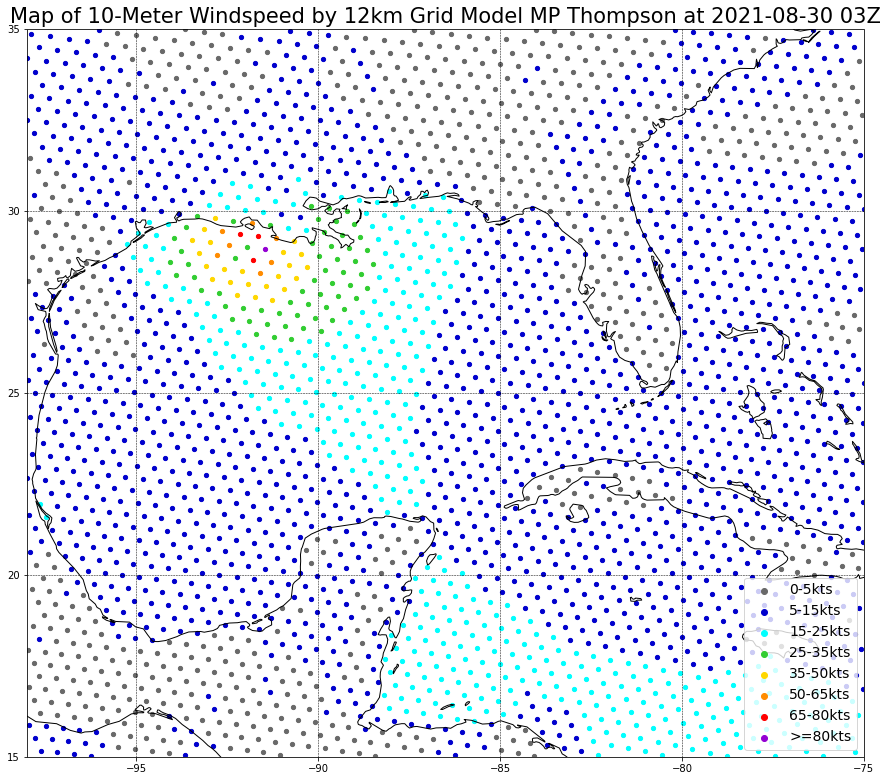

In [33]:
# Open Longitude, Latitude, U10 and V10 Files For Each Time Step
Strong_Wind_Count = 0
Gale_Wind_Count = 0
for i in range(len(Time_Step_List)):
    if i == 24:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        U10_File = numpy.array(File.u10[0]) * 3.6 / 1.852
        V10_File = numpy.array(File.v10[0]) * 3.6 / 1.852
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        U10_List = []
        V10_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                U10_List.append(U10_File[k])
                V10_List.append(V10_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Windspeed_NATL = numpy.sqrt(numpy.array(U10_List) **2 + numpy.array(V10_List) **2)
        Max_Wind_Index = numpy.argmax(Windspeed_NATL)
        print (Windspeed_NATL[Max_Wind_Index])
        print (Longitude_NATL[Max_Wind_Index] - 360)
        print (Latitude_NATL[Max_Wind_Index])
#
# Create Colour List For Labelling Windspeed
        Colour_List = []
        Colours = ['dimgrey', 'mediumblue', 'cyan', 'limegreen', 'gold', 'darkorange', 'red', 'darkviolet']
        Colour_Labels = ['0-5kts', '5-15kts', '15-25kts', '25-35kts', '35-50kts', '50-65kts', '65-80kts', '>=80kts']
        for j in range(len(Windspeed_NATL)):
            if Windspeed_NATL[j] < 5:
                Colour_List.append(Colours[0])
            elif Windspeed_NATL[j] < 15:
                Colour_List.append(Colours[1])
            elif Windspeed_NATL[j] < 25:
                Colour_List.append(Colours[2])
            elif Windspeed_NATL[j] < 35:
                Colour_List.append(Colours[3])
                Strong_Wind_Count += 1
            elif Windspeed_NATL[j] < 50:
                Colour_List.append(Colours[4])
                Strong_Wind_Count += 1
                Gale_Wind_Count += 1
            elif Windspeed_NATL[j] < 65:
                Colour_List.append(Colours[5])
                Strong_Wind_Count += 1
                Gale_Wind_Count += 1
            elif Windspeed_NATL[j] < 80:
                Colour_List.append(Colours[6])
                Strong_Wind_Count += 1
                Gale_Wind_Count += 1
            else:
                Colour_List.append(Colours[7])
                Strong_Wind_Count += 1
                Gale_Wind_Count += 1
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(Windspeed_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of 10-Meter Windspeed by 12km Grid Model MP Thompson at 2021-08-30 03Z', fontsize=21)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)
Fig.savefig('Q3_Windspeed_Map.png', bbox_inches='tight')

In [35]:
# Find Number of Grid Cells with Strong Wind and Gale Wind
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        U10_File = numpy.array(File.u10[0]) * 3.6 / 1.852
        V10_File = numpy.array(File.v10[0]) * 3.6 / 1.852
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        U10_List = []
        V10_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                U10_List.append(U10_File[k])
                V10_List.append(V10_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Windspeed_NATL = numpy.sqrt(numpy.array(U10_List) **2 + numpy.array(V10_List) **2)
#
# Find Number of Grid Cells with Strong or Gale Wind
        Strong_Wind_Count = 0
        Gale_Wind_Count = 0
        for j in range(len(Windspeed_NATL)):
            if Windspeed_NATL[j] >= 22:
                Strong_Wind_Count += 1
            if Windspeed_NATL[j] >= 34:
                Gale_Wind_Count += 1
        print (Strong_Wind_Count)
        print (Gale_Wind_Count)
#
# Estimate Distance Between Each Grid Point
Grid_Dist = numpy.sqrt(216**2 + 556**2) / 13.5
print (Grid_Dist)
#
# Calculate Area of Each Hexagonal Grid Area
Hexagon_Area = (Grid_Dist ** 2 * numpy.sqrt(3) / 4) / 4 * 6
#
# Calculate Total Area of Strong Wind and Gale Wind
Strong_Wind_Area = Hexagon_Area * Strong_Wind_Count
Gale_Wind_Area = Hexagon_Area * Gale_Wind_Count
#
# Estimate Strong Wind Radius
Strong_Wind_Radius = numpy.sqrt(Strong_Wind_Area / numpy.pi)
Gale_Wind_Radius = numpy.sqrt(Gale_Wind_Area / numpy.pi)
print ("Strong Wind Radius:", Strong_Wind_Radius, "km")
print ("Gale Wind Radius:", Gale_Wind_Radius, "km")

137
33
44.18392783284435
Strong Wind Radius: 235.1503425020309 km
Gale Wind Radius: 115.40969731489159 km


9.427749
-91.4285888671875
27.925402


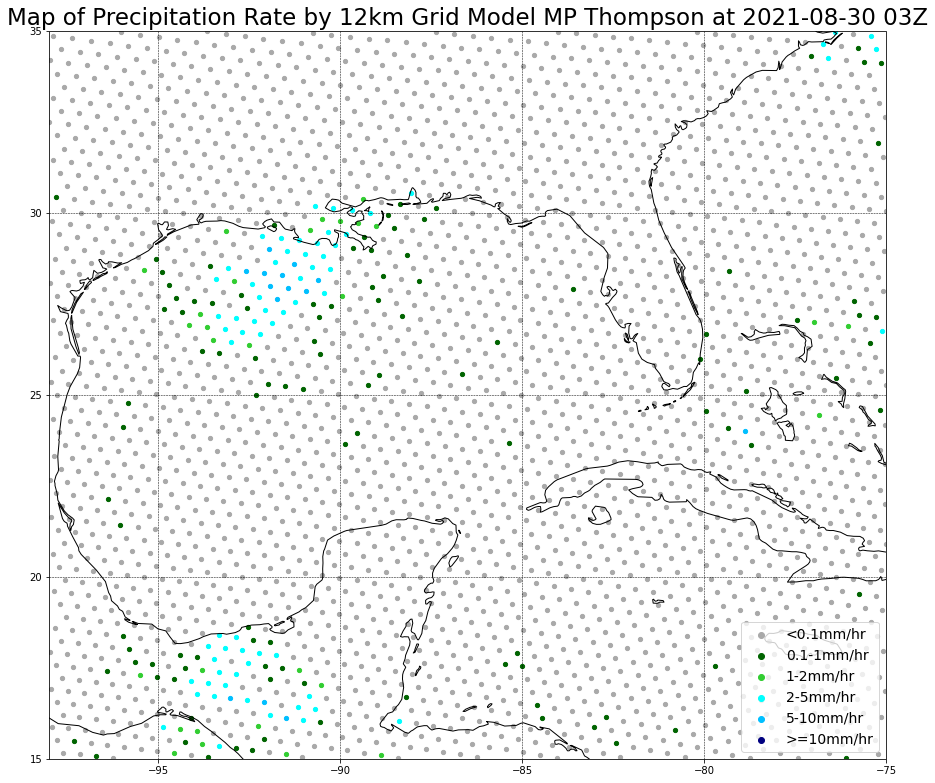

In [29]:
# Open Longitude, Latitude, Precip Rate Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 24:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        Rain_File = numpy.array(File.cuprec[0]) * 3600
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        Rain_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                Rain_List.append(Rain_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Rain_NATL = numpy.array(Rain_List)
        Max_Rain_Index = numpy.argmax(Rain_NATL)
        print (Rain_NATL[Max_Rain_Index])
        print (Longitude_NATL[Max_Rain_Index] - 360)
        print (Latitude_NATL[Max_Rain_Index])
#
# Create Colour List For Labelling Precip
        Colour_List = []
        Colours = ['darkgrey', 'darkgreen', 'limegreen', 'cyan', 'deepskyblue', 'navy']
        Colour_Labels = ['<0.1mm/hr', '0.1-1mm/hr', '1-2mm/hr', '2-5mm/hr', '5-10mm/hr', '>=10mm/hr']
        for j in range(len(Rain_NATL)):
            if Rain_NATL[j] < 0.1:
                Colour_List.append(Colours[0])
            elif Rain_NATL[j] < 1:
                Colour_List.append(Colours[1])
            elif Rain_NATL[j] < 2:
                Colour_List.append(Colours[2])
            elif Rain_NATL[j] < 5:
                Colour_List.append(Colours[3])
            elif Rain_NATL[j] < 10:
                Colour_List.append(Colours[4])
            else:
                Colour_List.append(Colours[5])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(Rain_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Precipitation Rate by 12km Grid Model MP Thompson at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)
Fig.savefig('Q3_Precip_Map.png', bbox_inches='tight')

[ 3.8255923e-05  6.6433771e-05  6.1214072e-05 ... -1.4174974e-06
  1.2380532e-05 -7.4564832e-06]


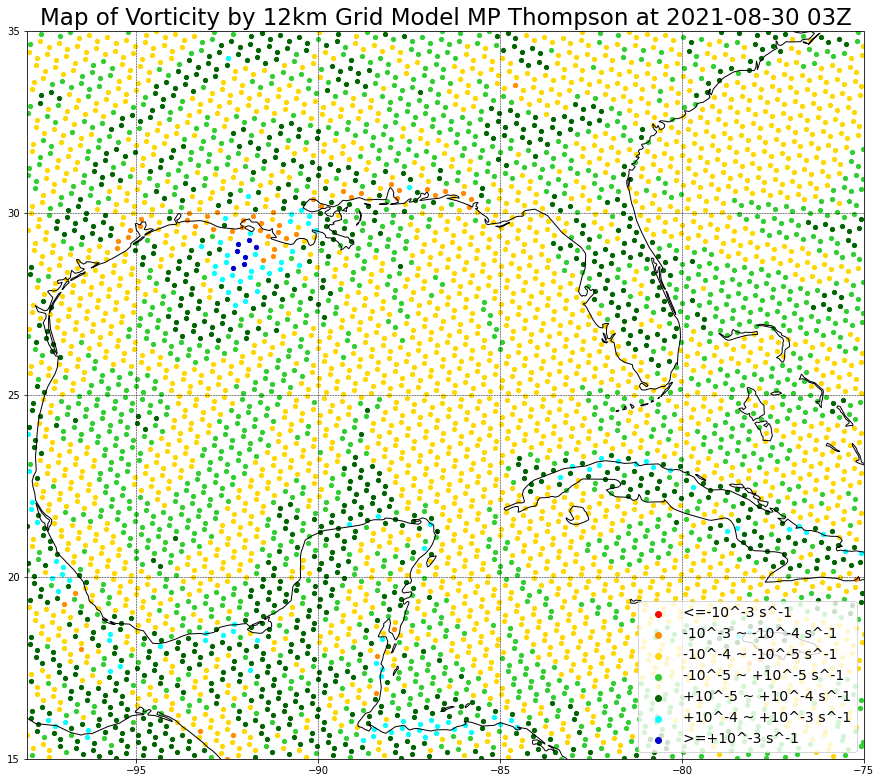

In [26]:
# Open Longitude, Latitude, Vorticity Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 24:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonVertex * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latVertex * 360 / (2*numpy.pi))
        Vorticity_File = numpy.array(File.vorticity[0,:,0])
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        Vorticity_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >= -98 and Longitude_File[k] < -75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                Vorticity_List.append(Vorticity_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Vorticity_NATL = numpy.array(Vorticity_List)
        print (Vorticity_NATL)
#
# Create Colour List For Labelling Vorticity
        Colour_List = []
        Colours = ['red', 'darkorange', 'gold', 'limegreen', 'darkgreen', 'cyan', 'mediumblue']
        Colour_Labels = ['<=-10^-3 s^-1', '-10^-3 ~ -10^-4 s^-1', '-10^-4 ~ -10^-5 s^-1', \
        '-10^-5 ~ +10^-5 s^-1', '+10^-5 ~ +10^-4 s^-1', '+10^-4 ~ +10^-3 s^-1', '>=+10^-3 s^-1']
        for j in range(len(Vorticity_NATL)):
            if Vorticity_NATL[j] <= -10**-3:
                Colour_List.append(Colours[0])
            elif Vorticity_NATL[j] <= -10**-4:
                Colour_List.append(Colours[1])
            elif Vorticity_NATL[j] <= -10**-5:
                Colour_List.append(Colours[2])
            elif Vorticity_NATL[j] < 10**-5:
                Colour_List.append(Colours[3])
            elif Vorticity_NATL[j] < 10**-4:
                Colour_List.append(Colours[4])
            elif Vorticity_NATL[j] < 10**-3:
                Colour_List.append(Colours[5])
            else:
                Colour_List.append(Colours[6])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(Vorticity_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Vorticity by 12km Grid Model MP Thompson at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)

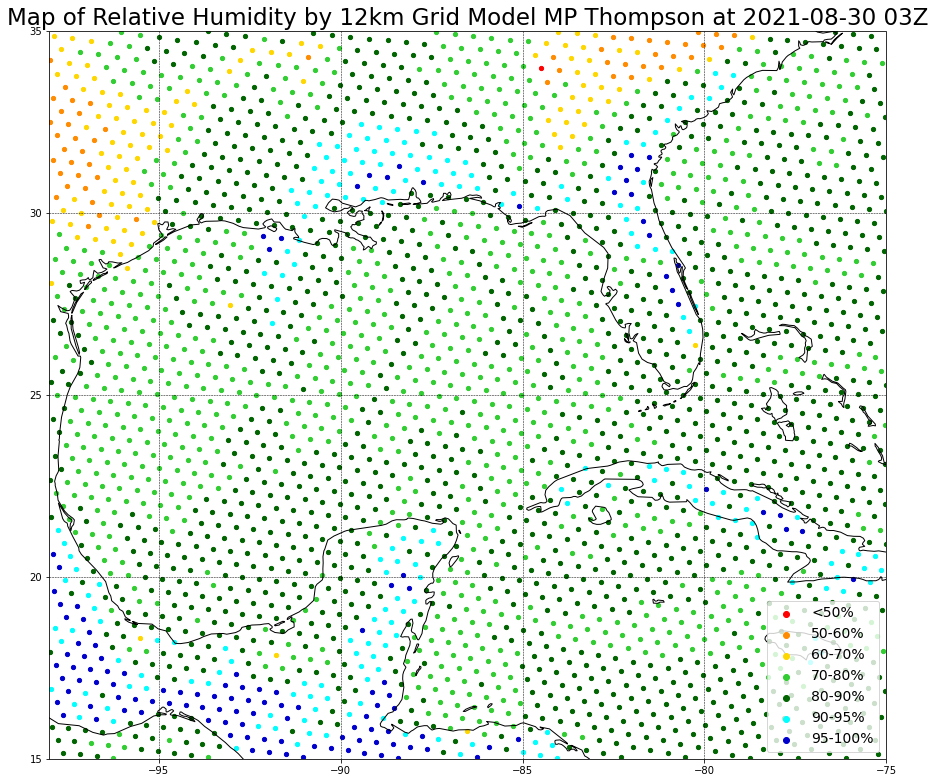

In [27]:
# Open Longitude, Latitude, Precip Rate Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 24:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        RH_File = numpy.array(File.relhum[0,:,0])
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        RH_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                RH_List.append(RH_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        RH_NATL = numpy.array(RH_List)
#
# Create Colour List For Labelling Precip
        Colour_List = []
        Colours = ['red', 'darkorange', 'gold', 'limegreen', 'darkgreen', 'cyan', 'mediumblue']
        Colour_Labels = ['<50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-95%', '95-100%']
        for j in range(len(RH_NATL)):
            if RH_NATL[j] < 50:
                Colour_List.append(Colours[0])
            elif RH_NATL[j] < 60:
                Colour_List.append(Colours[1])
            elif RH_NATL[j] < 70:
                Colour_List.append(Colours[2])
            elif RH_NATL[j] < 80:
                Colour_List.append(Colours[3])
            elif RH_NATL[j] < 90:
                Colour_List.append(Colours[4])
            elif RH_NATL[j] < 95:
                Colour_List.append(Colours[5])
            else:
                Colour_List.append(Colours[6])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(RH_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Relative Humidity by 12km Grid Model MP Thompson at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)

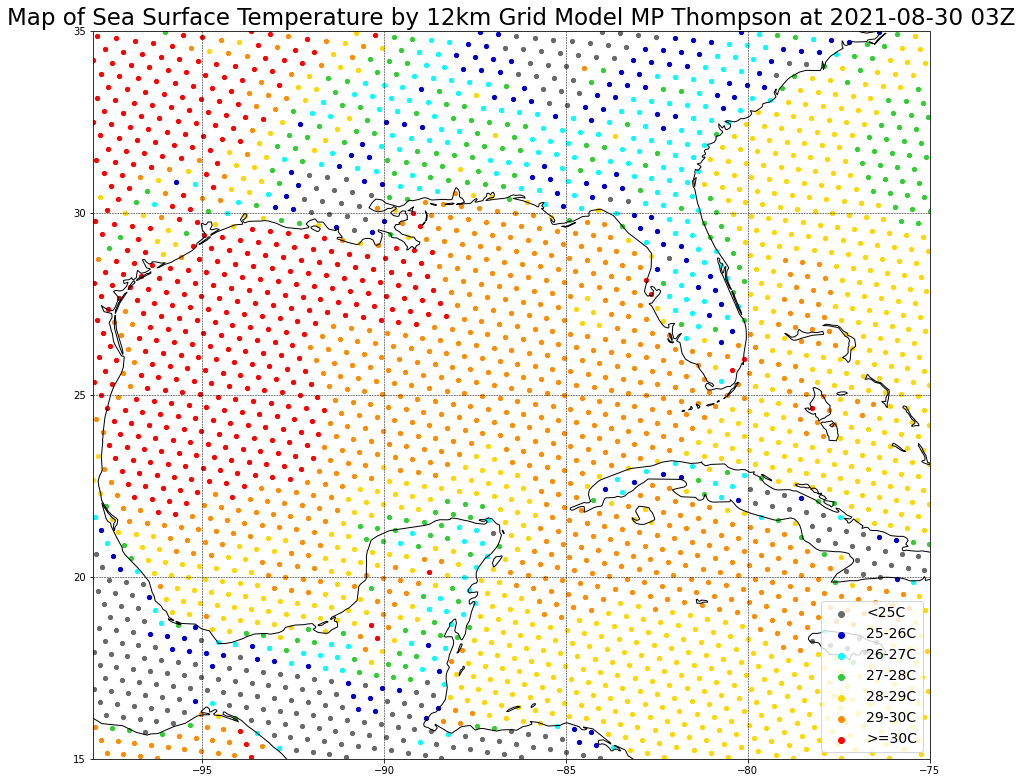

In [28]:
# Open Longitude, Latitude, SST Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 24:
        File = xr.open_dataset(Diri + 'history.Q3.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        SST_File = numpy.array(File.sst[0]) - 273.15
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        SST_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                SST_List.append(SST_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        SST_NATL = numpy.array(SST_List)
#
# Create Colour List For Labelling SST
        Colour_List = []
        Colours = ['dimgrey', 'mediumblue', 'cyan', 'limegreen', 'gold', 'darkorange', 'red']
        Colour_Labels = ['<25C', '25-26C', '26-27C', '27-28C', '28-29C', '29-30C', '>=30C']
        for j in range(len(SST_NATL)):
            if SST_NATL[j] < 25:
                Colour_List.append(Colours[0])
            elif SST_NATL[j] < 26:
                Colour_List.append(Colours[1])
            elif SST_NATL[j] < 27:
                Colour_List.append(Colours[2])
            elif SST_NATL[j] < 28:
                Colour_List.append(Colours[3])
            elif SST_NATL[j] < 29:
                Colour_List.append(Colours[4])
            elif SST_NATL[j] < 30:
                Colour_List.append(Colours[5])
            else:
                Colour_List.append(Colours[6])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(SST_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Sea Surface Temperature by 12km Grid Model MP Thompson at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)